# Dèbruitage d'images

À chaque étape de l'acquisition d'une scène, il arrive souvent que des perturbations dégradent la qualité de l'image. 
Appelées "bruit d'image", ces perturbations viennent de l'environnement pendant l'acquisition, de la qualité du capteur, de la quantification ou de l'amplification, etc.
Le **débruitage** est une technique d'édition qui consiste à supprimer des éléments indésirables, afin de rendre un document (une image par exemple), un signal ou un environnement plus intelligible ou plus pur, et cela, en gardant le maximum d'informations possibles.
Le choix des algorithmes efficaces pour le débruitage d'images numériques reste encore un défi scientifique. 
Plusieurs algorithmes ont été publiés et chaque approche a ses propres suppositions, avantages et limitations.
Mais dans le cadre de ce projet, nous allons nous limiter aux filtrages linéaires et un type de filtrage non linéaire qui est le filtrage médian.
Toujours dans le but de rendre meilleure la qualité de l'image, on a tendance à mettre du flou en essayant d'éliminer du bruit. Et dans ce cas, le sharpening permet de supprimer du flou, d'améliorer les détails et l'écorçage constaté sur une image.
Donc il sera tout à fait plus avantageux d'accompagner certaines méthodes de débruitage à un sharpening.
Selon **"Wikipédia"**, en traitement d'image et en vision par ordinateur, on appelle détection de contours les procédés permettant de repérer les points d'une image matricielle qui correspondent à un changement brutal de l'intensité lumineuse. Ce procédé, réduit de manière significative la quantité de données en conservant des informations qu'on peut juger plus pertinentes.
Ainsi, nous allons développer chaque point avec des arguments et applications très claires pour mieux comprendre ces notions sans oublier de faire des comparaisons entre ces dernières.

In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage 
import matplotlib.colors

# Import des images pour la pratique :

On utilisera les fonctions **imread** et **imshow** de **matplotlib.pyplot** pour lire et afficher nos images.
- **plt.imread()** : Permet  de lire une image d’un fichier dans un tableau, l’image s’ouvre en mode lecture-binaire.
- **plt.imshow()** : Affiche les données sous forme d’image, c’est-à-dire sur une trame 2D régulière.

L'entée peut être des données RVB(A) réelles, ou des données scalaires 2D, qui sera rendu sous forme d’image pseudo-couleur.

**Remarque:**

plt.imread() lit les images au format PNG comme des numpy arrays de nombres flottants (float) entre 0 et 1, 
mais lit les images aux formats JPEG et BMP comme des numpy arrays à entiers 8 bits.

Si on utilise des images JPEG ou BMP, probablement on devra les normaliser sur (0,1).

Si "im" est une image codée comme un double numpy array, 
plt.imshow(im) affichera toutes les valeurs supérieures à 1 en blanc et toutes les valeurs négatives en noir. 
Si l'image est codée sur 8 bits, plt.imshow(im) affichera 0 en noir et 255 en blanc.

In [212]:
imrgb1 =plt.imread("https://www.idpoisson.fr/louchet/wp-content/uploads/sites/35/2021/01/Cameraman-1.png")
Cameraman = np.mean(imrgb1, -1)
imrgb2 =plt.imread("https://www.idpoisson.fr/louchet/wp-content/uploads/sites/35/2021/01/parcfloral.png")
parcfloral = np.mean(imrgb2,2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12220\2061621759.py:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  imrgb1 =plt.imread("https://www.idpoisson.fr/louchet/wp-content/uploads/sites/35/2021/01/Cameraman-1.png")
C:\Users\DELL\AppData\Local\Temp\ipykernel_12220\2061621759.py:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  imrgb2 =plt.imread("https://www.idpoisson.fr/louchet/wp-content/uploads/sites/35/2021/01/parcfloral.png")


# Effet des filtres

À chaque étape de l'acquisition d'une scène, il arrive souvent que des perturbations dégradent la qualité de l'image. 
Appelées "bruit d'image", ces perturbations viennent de l'environnement pendant l'acquisition, de la qualité du capteur, de la quantification ou de l'amplification, etc.
Le débruitage est une technique d'édition qui consiste à supprimer des éléments indésirables, afin de rendre un document (une image par exemple), un signal ou un environnement plus intelligible ou plus pur, et cela, en gardant le maximum d'informations possibles.
Le choix des algorithmes efficaces pour le débruitage d'images numériques reste encore un défi scientifique. Plusieurs algorithmes ont été publiés et chaque approche a ses propres suppositions, avantages et limitations.
Mais dans le cadre de ce projet, nous allons nous limiter aux filtrages linéaires et un type de filtrage non linéaire qui est le filtrage médian.
Toujours dans le but de rendre meilleure la qualité de l'image, on a tendance à mettre du flou en essayant d'éliminer du bruit. Et dans ce cas, le sharpening permet de supprimer du flou, d'améliorer les détails et l'écorçage constaté sur une image.
Donc il sera tout à fait plus avantageux d'accompagner certaines méthodes de débruitage à un sharpening.

Selon "Wikipédia", en traitement d'image et en vision par ordinateur, on appelle détection de contours les procédés permettant de repérer les points d'une image matricielle qui correspondent à un changement brutal de l'intensité lumineuse. Ce procédé, réduit de manière significative la quantité de données en conservant des informations qu'on peut juger plus pertinentes.
Ainsi, nous allons développer chaque point avec des arguments et applications très claires pour mieux comprendre ces notions sans oublier de faire des comparaisons entre ces dernières.

## 1) Filtrage linéaire en traitement d'image :

Le filtrage linéaire est une opération classique pour le prétraitement des images visant à réduire un bruit (filtre passe-bas) et à rehausser une image pour la détection des contours (filtre passe-bande ou passe-haut).
Étant donné une image **Y**, un filtre linéaire sur **Y**, remplace la valeur de chaque pixel en entrée par une combinaison des intensités de ses pixels voisins ; et cela, sans modifier la position de ses derniers, car la linéarité garantie l'invariance par translation. Mais on peut bien remarquer que cela a un impact sur le voisinage vu que le traitement est locale.
Et sur cette logique, on donne la formule du filtrage linéaire comme étant :

$ \forall {(i,j)}, \hat{X}_{i,j} = \frac{\sum_{(k,l) \in \Omega } w_{k,l} y_{i+k,j+l}}{\sum_{(k,l)\in \Omega} w_{k,l}} $

avec $\Omega$ le voisinage sur lequel on effectue notre filtrage, les $ w_{k,l}$ les poids attribués à chaque pixel selon son impact, et les $\hat{X}_{i,j}$ coefficient de la nouvelle image obtenue par filtrage linéaire.  

Mathématiquement, effectuer un filtrage linéaire revient à faire soit un filtrage par convolution, soit un filtrage par transformée de Fourier. 

En effet, partant de la formule générale, si $W$ symétrique et à support borné, alors on retrouve la convolution de $Y$ à $W$ définit par :

$\hat{X}$ = $W*Y$ 
avec $W$ de somme $1$ (ou positive) est appelé noyau également.
Mais par ailleurs, on peut rappeler que 

$ F(W*Y) = F(W)F(Y)$ qui nous dit que la transformée de Fourier d'un produit de convolution est le produit des transformées de Fourier.

Ainsi, il est tout à fait naturel de se poser la question, à savoir laquelle des deux utilisés  ?

On peut ainsi appliquer un filtre linéaire **W** en multipliant la transformée de Fourier d’une image par la
transformée de Fourier du filtre, puis en effectuant la transformée de Fourier inverse du résultat. 

Pour une image de taille $n^2$ et un masque de taille $m^2$, la multiplication nécessite $n^2$ opérations, et l’algorithme FFT a une complexité de $O(n^2.log(n^2))$ , 

ce qui donne une complexité totale en $O(n^2 log n2)$. 

Pour un filtrage spatial, la complexité est en $O(n^2 *m)$ si le filtre est séparable et de taille m, et en $O(n^2 *m^2)$ si le filtre n’est pas séparable et de taille $m$.
Le choix entre les 2 techniques de lissage se fera donc en comparant $m$ et $log(n)$

**NB** : Dans ce qui va suivre, on adoptera la méthode de filtrage par convolution.

## 1.2 Filtres moyenneur

Partant de la formule générale du filtrage linéaire, on peut distinguer plusieurs types de filtrage linéaire selon le choix de W qui correspond au filtre appliqué à l'image appelé noyau ou masque (et on parle de kernel en anglais).
Ici la méthode qu'on mettra en exergue est celle de la convolution d'une image par le noyau (masque).
Le typage dépendra essentiellement du noyau.
Lorsqu'on choisit de manière uniforme les poids, on parle de filtre moyenneur.
Il part du principe selon lequel chaque pixel dans une image de bonne qualité doit avoir une intensité similaire à celle de ses voisins. Elle utilise la moyenne arithmétique qui suppose même que chaque voisin contribue à part égale. Elle est opérationnelle sur un voisinage de la manière suivante :

$\hat{X}_{i,j} = \frac{1}{Card(\Omega)} \sum_{(k,l) \in \Omega} y_{i+k,j+l} $ .

Pour mieux fixer les idées, on peut voir l'exemple suivant dont le filtre est un carré **3*3** constant sur un voisinage de **9** :

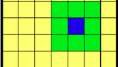
$W=\begin{pmatrix}
   1/9 & 1/9 & 1/9\\
   1/9 & 1/9 & 1/9\\
   1/9 & 1/9 & 1/9
    \end{pmatrix} = \frac{1}{9}\begin{pmatrix}
   1 & 1 & 1\\
   1 & 1 & 1\\
   1 & 1 & 1
    \end{pmatrix} $
    
$W$ représente le noyau.

# Quelques applications du filtre moyenneur :
Pour mieux voir l'efficacité du filtre, on va mettre différents bruits sur nos images.

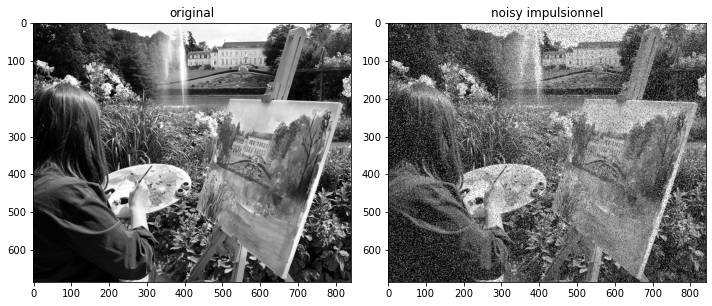

In [213]:
#################################################################
# Ajout de bruit impulsionnel à l'image parcforal ###############
#################################################################

[nrow, ncol] = parcfloral.shape
p = 0.25
btab = (np.random.rand(nrow, ncol) >= p)
utab = np.random.rand(nrow, ncol)
imnoise_impulsionnel = btab*parcfloral + (1 - btab)*utab
# Visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].set_title('original')
axes[0].imshow(parcfloral,cmap='gray')
axes[1].set_title('noisy impulsionnel')
axes[1].imshow(imnoise_impulsionnel,cmap='gray')
fig.tight_layout()

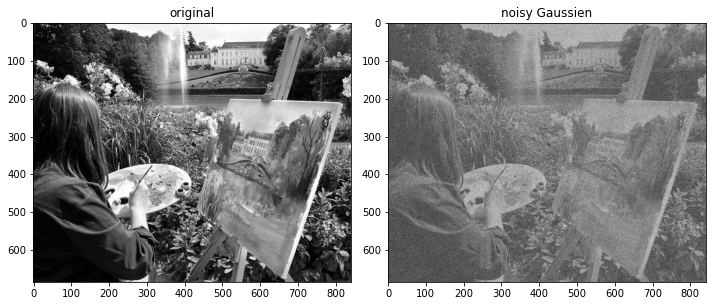

In [214]:
##################################################################
######### Ajout de bruit blanc gaussien à l'image parcforal ######
##################################################################
[nrow, ncol] = parcfloral.shape 
gnoise = np.random.randn(nrow, ncol)  
sigma=0.2                             # ecart-type
imnoise_Gaussien = parcfloral + sigma*gnoise  # ajout de bruit Gaussien

###########################
# Visualisation ###########
###########################
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].set_title('original')
axes[0].imshow(parcfloral,cmap='gray')
axes[1].set_title('noisy Gaussien')
axes[1].imshow(imnoise_Gaussien,cmap='gray')
fig.tight_layout()

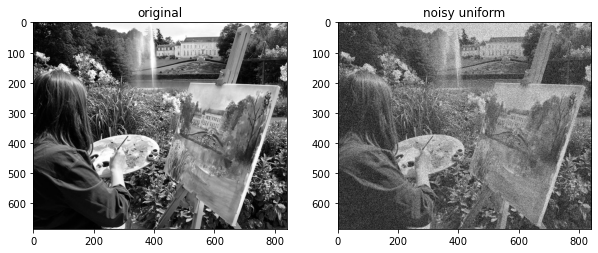

In [215]:
##################################################################
## Ajout de bruit blanc uniforme à l'image parcforal #############
##################################################################

[nrow, ncol] = parcfloral.shape 
unoise = np.random.rand(nrow, ncol) - 1/2    # Permet de définir une matrice remplie de valeurs tirées de manière uniforme
sigma = 0.6
imnoise_uniform = parcfloral + sigma*unoise    # ajout de bruit blanc uniforme

#######################
# Visualisation #######
#######################

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].set_title('original')
axes[0].imshow(parcfloral,cmap='gray')
axes[1].set_title('noisy uniform')
axes[1].imshow(imnoise_uniform,cmap='gray')

Veuillons voir ce que donne un filtre moyenneur defini dans l'exemple.

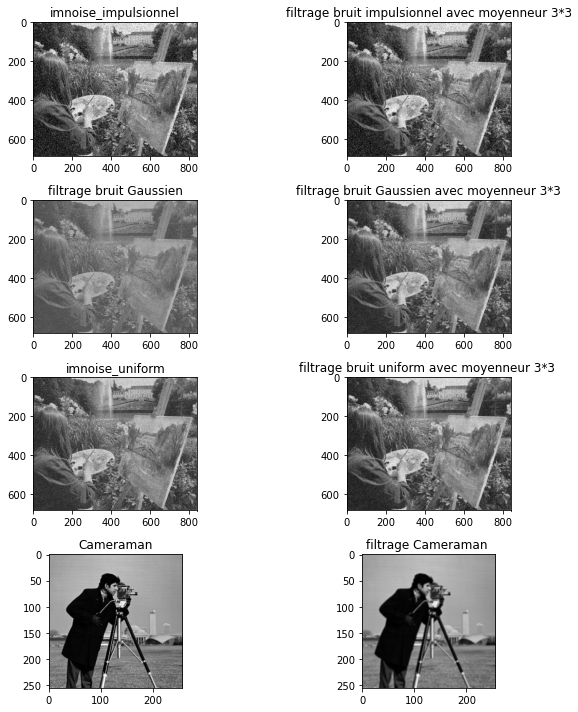

In [217]:
Kernel= np.ones([3,3])/9 # définition d'un filtre 3*3 moyenneur
moyenneur_impulsionnel= ndimage.convolve(imnoise_impulsionnel,Kernel,mode='reflect',cval=(0.0)) # filtrage d'un bruit impulsionnel par Kernel.
moyenneur_gaussien= ndimage.convolve(imnoise_Gaussien,Kernel,mode='reflect',cval=(0.0))  # filtrage d'un bruit blanc gaussien  par Kernel.
moyenneur_uniform= ndimage.convolve(imnoise_uniform,Kernel,mode='reflect',cval=(0.0))   # filtrage d'un bruit blanc uniforme  par Kernel.
im_conv3x3 = ndimage.convolve(Cameraman, Kernel, mode='reflect',cval=(0.0)) # filtrage moyenneur 3*3 de cameraman 

##########################
# VISUALISATION ##########
##########################

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

axes[0,0].set_title('imnoise_impulsionnel')
axes[0,0].imshow(imnoise_impulsionnel,cmap='gray')
axes[0,1].set_title('filtrage bruit impulsionnel avec moyenneur 3*3')
axes[0,1].imshow(moyenneur_impulsionnel,cmap='gray')
# pour le bruit blanc gaussien
axes[1,0].set_title('filtrage bruit Gaussien')
axes[1,0].imshow(imnoise_Gaussien,cmap='gray')
axes[1,1].set_title('filtrage bruit Gaussien avec moyenneur 3*3')
axes[1,1].imshow(moyenneur_gaussien,cmap='gray')
 # pour le bruit blanv uniforme
axes[2,0].set_title('imnoise_uniform')
axes[2,0].imshow(imnoise_uniform,cmap='gray')
axes[2,1].set_title('filtrage bruit uniform avec moyenneur 3*3 ')
axes[2,1].imshow(moyenneur_uniform,cmap='gray')
 # pour l'image Cameraman
axes[3,0].set_title('Cameraman')
axes[3,0].imshow(Cameraman,cmap='gray')
axes[3,1].set_title('filtrage Cameraman ')
axes[3,1].imshow(im_conv3x3,cmap='gray')
fig.tight_layout()

Pour diminuer l'effet carré (anisotrope) du filtre constant, on va "arrondir" le filtre en le mettant constant sur un disque centré, et 0 au-delà du disque. 
On peut appeler cela un filtre de voisinage isotrope. Bien sûr, on s'arrange à ce que la somme du masque soit toujours 1, il faut donc diviser par le nombre de pixels dans le disque.

3.148912050886419e-05 0.9999999999999999


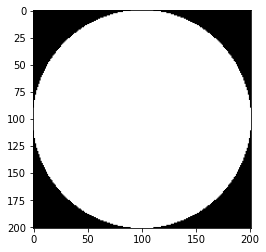

In [218]:
# Définition d'un masque constant isotrope
s = 100
y,x = np.ogrid[-s: s+1, -s: s+1]
val = x*x+y*y < (s+1/2)**2
mask_rounded = np.zeros((2*s+1, 2*s+1))
mask_rounded[val] = 1.0
mask_rounded = mask_rounded/np.sum(mask_rounded)
print(np.max(mask_rounded),np.sum(mask_rounded))
plt.imshow(mask_rounded,cmap='gray')

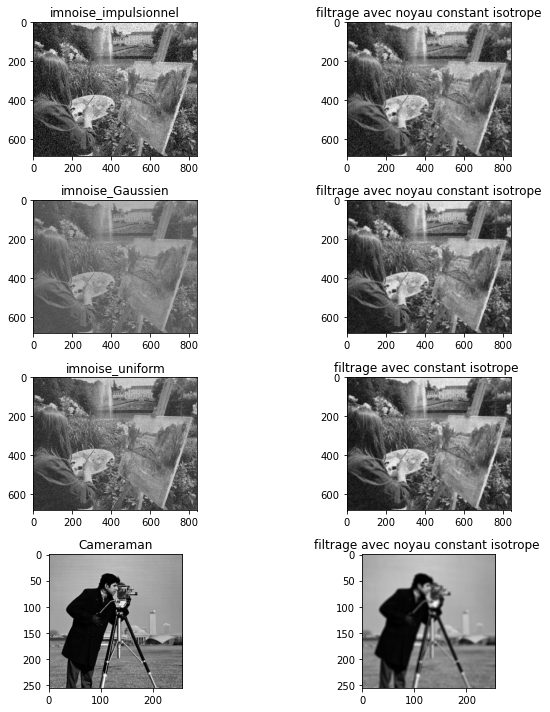

In [220]:
moyenneur_impulsionnel_iso= ndimage.convolve(imnoise_impulsionnel,mask,mode='reflect',cval=(0.0)) # filtrage d'un bruit impulsionnel par Kernel.
moyenneur_gaussien_iso= ndimage.convolve(imnoise_Gaussien,mask,mode='reflect',cval=(0.0))  # filtrage d'un bruit blanc gaussien  par Kernel.
moyenneur_uniform_iso= ndimage.convolve(imnoise_uniform,mask,mode='reflect',cval=(0.0))   # filtrage d'un bruit blanc uniforme  par Kernel.
im_conv_iso = ndimage.convolve(Cameraman, mask, mode='reflect',cval=(0.0)) # filtrage moyenneur de cameraman 

# VISUALISATION
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

axes[0,0].set_title('imnoise_impulsionnel')
axes[0,0].imshow(imnoise_impulsionnel,cmap='gray')
axes[0,1].set_title('filtrage avec noyau constant isotrope')
axes[0,1].imshow(moyenneur_impulsionnel_iso,cmap='gray')
# pour le bruit blanc gaussien
axes[1,0].set_title('imnoise_Gaussien')
axes[1,0].imshow(imnoise_Gaussien,cmap='gray')
axes[1,1].set_title('filtrage avec noyau constant isotrope')
axes[1,1].imshow(moyenneur_gaussien_iso,cmap='gray')
 # pour le bruit blanc uniforme
axes[2,0].set_title('imnoise_uniform')
axes[2,0].imshow(imnoise_uniform,cmap='gray')
axes[2,1].set_title('filtrage avec constant isotrope ')
axes[2,1].imshow(moyenneur_uniform_iso,cmap='gray')
 # pour l'image Cameraman
axes[3,0].set_title('Cameraman')
axes[3,0].imshow(Cameraman,cmap='gray')
axes[3,1].set_title('filtrage avec noyau constant isotrope ')
axes[3,1].imshow(im_conv_iso,cmap='gray')
fig.tight_layout()

Pour appliquer ce filtre, on a utilisé la commande **ndimage.convolve**  du sous module ndimage de **SciPy**.
- Comme nous l'avions développé au début, effectuer un filtrage linéaire revient à faire un filtrage par convolution.
- La syntaxe de cette dernière est : ndimage.convolve (input, weights, output=None, mode='reflect', cval=0.0, origin=0) retourne le résultat de la convolution de input et weights. 
- Nous allons utiliser seulement les paramètres **mode**, **cval** et **weights** et c'est intéressant de savoir leur utilité.
-  Le paramètre **mode** détermine comment le tableau d’entrée est étendu au-delà de ses limites et en particulier contrôle les effets de bords. 
    La valeur par défaut est **'reflect'**. Il peut prendre d'autre valeur comme **'constant', 'nearest', 'mirror', 'wrap'** mais si on teste ces différentes modes, on constate que **reflect** est plus adapté pour notre cas.
    
- **input** correspond à l'image sur laquelle on veut effectuer un filtrage
- **weights**: est le noyau encore appelé masque.
- **cval**: valeur pour remplir les bords d’entrée passés si le mode est constant.

# Remarque :
On peut bien remarquer que le filtrage moyenneur permet de réduire le bruit, cependant il y a présence de flou dans l'image de sortie. 

On voit aussi le lissage de cette dernière.

Sur la logique du fait que le typage dépend du noyau, on peut citer d'autres types de filtrage linéaire comme : 

le filtre avec**le noyau exponentiel** dont le masque est défini par :

$\forall {(i,j)}$,
$ W_i,j =exp(-\frac{\sqrt{i^2+j^2}}{\sigma}) $ ,

$ \text{le filtre de voisinage definit par}$ :

$ W_i,j  = \left\{ 
\begin{array}{l l}
 1 & \quad (i,j)\in\Omega\\
  0 & \quad sinon\\
  \end{array} \right. $

## 1.2) Filtres Gaussien

Comme tout filtre linéaire, a pour principe de réduire le bruit.
Mais différent du filtre moyenneur, il ne cause pas de recouvrement spectral, car sa transformée de Fourier est une gaussienne sans lobes secondaires. De plus, le filtre Gaussien est séparable, notion qui lui permet de filtrer les lignes ainsi que les colonnes, mais cela lui permet également d'effectuer les calculs plus rapidement par rapport à la convolution classique en 2D.


Par exemple, pour un filtre 5 x 5 :
Une convolution 2D classique requiert 25 multiplications et 24 additions, soit 49 opérations par pixel, mais en exploitant la séparabilité du filtre Gaussien, on réduit la complexité algorithmique à 2 x 5 multiplications et 2 x 4 additions, soit 18 opérations par pixel. Du coup, il a un grand intérêt lorsque l'image à filtrer est de taille importante.
Ces éléments du masque de convolution sont déterminés selon la densité d'une loi gaussienne centrée à 2 dimensions.
Comme le noyau doit comporter un nombre fini d'éléments, on calcule une approximation discrète de la densité gaussienne, celle-ci étant continue et strictement positive sur R. En pratique, la fonction est souvent échantillonnée sur ]−3T,3T), car elle est quasiment nulle en dehors de cet intervalle. On définit son noyau comme étant :


$W_i,j =exp(-\frac{i^2+j^2}{2.\sigma^2})$ avec $\sigma$  l'écart-type.

Il est très important de faire un bon choix de σ selon le contexte de son application.


**Généralement**, un filtre gaussien avec $ σ < 1$, est utilisé pour réduire le bruit, et si $ σ >1 $, c'est dans le but de fabriquer une image qu’on va utiliser pour faire un "masque flou"  personnalisé. Il faut noter que plus σ est grand, plus le flou applique à l’image sera marquée. 

#  Quelques applications du filtre Gaussien :


**Détails sur la fonction ndimage.gaussian_filter :**

Elle fait le travail que **ndimage.convolve** sauf que ici la fonction revoie un filtre gaussien multidimensionnel et au lieu de prendre un masque, on lui fournit l'écart-type sigma.

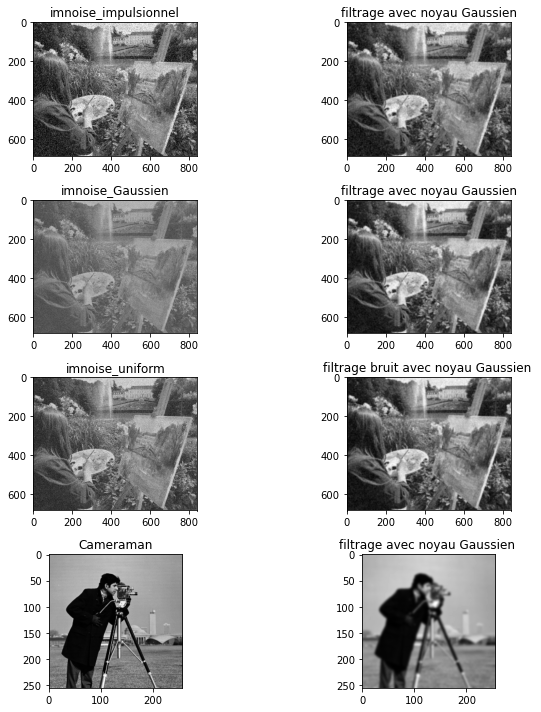

In [222]:
sigma = 2
im_conv10 = ndimage.gaussian_filter(Cameraman, sigma) # filtrage par un noyau Gaussien de l'image Cameraman 
Gauss_impulsionnel= ndimage.gaussian_filter(imnoise_impulsionnel,sigma) # filtrage d'un bruit impulsionnel par un noyau Gaussien.
Gauss_gaussien= ndimage.gaussian_filter(imnoise_Gaussien,sigma)  # filtrage d'un bruit blanc gaussien  par un noyau Gaussien
Gauss_uniform= ndimage.gaussian_filter(imnoise_uniform,sigma)   # filtrage d'un bruit blanc uniforme  par un noyau Gaussien

# VISUALISATION
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10)) 

axes[0,0].set_title('imnoise_impulsionnel')
axes[0,0].imshow(imnoise_impulsionnel,cmap='gray')
axes[0,1].set_title('filtrage avec noyau Gaussien')
axes[0,1].imshow(Gauss_impulsionnel,cmap='gray')
# pour le bruit blanc gaussien
axes[1,0].set_title('imnoise_Gaussien')
axes[1,0].imshow(imnoise_Gaussien,cmap='gray')
axes[1,1].set_title('filtrage avec noyau Gaussien')
axes[1,1].imshow(Gauss_gaussien,cmap='gray')
 # pour le bruit blanv uniforme
axes[2,0].set_title('imnoise_uniform')
axes[2,0].imshow(imnoise_uniform,cmap='gray')
axes[2,1].set_title('filtrage bruit avec noyau Gaussien ')
axes[2,1].imshow(Gauss_uniform,cmap='gray')
 # pour l'image Cameraman
axes[3,0].set_title('Cameraman')
axes[3,0].imshow(Cameraman,cmap='gray')
axes[3,1].set_title('filtrage avec noyau Gaussien ')
axes[3,1].imshow(im_conv10,cmap='gray')
fig.tight_layout()

On pourra comparer le filtrage par un masque constant sur un disque, le filtrage gaussien et le filtrage par un masque constant (carré). 

Comment régler les paramètres pour que les résultats soient comparables ?

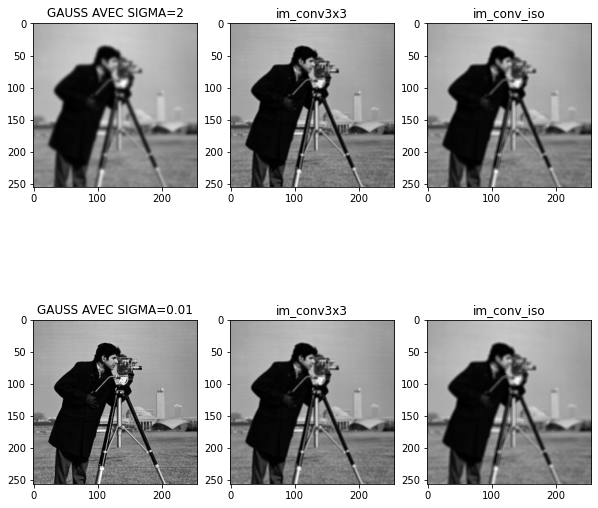

In [223]:
sigma1 = 2
im_conv10 = ndimage.gaussian_filter(Cameraman, sigma1)
im_conv3x3 = ndimage.convolve(Cameraman, Kernel, mode='reflect',cval=(0.0)) # filtrage moyenneur 3*3 de cameraman 
im_conv_iso = ndimage.convolve(Cameraman, mask, mode='reflect',cval=(0.0)) # filtrage moyenneur de cameraman 

sigma2=0.01
im_conv10_ = ndimage.gaussian_filter(Cameraman, sigma2)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

axes[0,0].set_title('GAUSS AVEC SIGMA=2')
axes[0,0].imshow(im_conv10,cmap='gray')
axes[0,1].set_title('im_conv3x3')
axes[0,1].imshow(im_conv3x3,cmap='gray')
axes[0,2].set_title('im_conv_iso')
axes[0,2].imshow(im_conv_iso,cmap='gray')
axes[1,0].set_title('GAUSS AVEC SIGMA=0.01')
axes[1,0].imshow(im_conv10_,cmap='gray')
axes[1,1].set_title('im_conv3x3')
axes[1,1].imshow(im_conv3x3,cmap='gray')
axes[1,2].set_title('im_conv_iso')
axes[1,2].imshow(im_conv_iso,cmap='gray')

Ce sont des choses déjà dit qui viennent d'être confirmé.
- **Lorsque sigma >1**, le filtre Gaussien ne sert pas à réduire du bruit et est moins efficace par rapport aux filtres moyenneur. Cependant, le filtre isotrope élimine le bruit, mais laisse beaucoup de flou dans l'image et lisse l'image. Le filtre carré 3*3  élimine le bruit sans créer trop de flou comparé aux autres.  
Ainsi, on constate que ce dernier est plus avantageux.
- **Dans le cas sigma<1**, le filtre Gaussien est meilleur que les filtres moyenneur pour réduire le bruit.

**Pour pouvoir les comparer, il faut s'assurer que $sigma$ soit strictement inférieur à 1.**

# Remarque:

**Notons que le filtre Gaussien a beaucoup d'intérêt, que ce soit le fait de pouvoir accélérer le calcul, atténue le bruit et quand n est suffisamment grand, il tend vers 0. avec n = nombre de gaussiens.
Malheureusement, on n'obtient pas l'image parfaite, mais l'image lissée, d'où la présence de flou sur l'image. 
Ce problème est intrinsèque aux filtres linéaires.**

# 3) Pourquoi faire appel à un sharpening ?
 

Le **sharpening** est généralement nécessaire pour corriger les images floues et compenser les secousses de la caméra et le flou de mouvement. 

Comme on vient de le voir avec le **filtrage linéaire**, en voulant éliminer du bruit, on crée du flou, d'où l'importance de faire appel à un sharpening pour réduire du flou.
Même si le processus n’est pas capable de reconstruire l’image idéale, il est capable de créer l’apparence d’un bord plus prononcé (voir netteté : acutance et résolution). La clé d’un affûtage efficace est de trouver l’équilibre délicat entre faire paraître les bords suffisamment prononcés.

Filtre gaussien pour débruiter une image avec réglage de sigma en fonction de la quantité de bruit :

Considérons une image floue ; on voudrait rattraper un peu la netteté de l'image. On sait qu'en la filtrant avec un filtre gaussien, on la rendra encore plus floue. Alors en lui retranchant un peu de ce qu'on aurait ajouté en la filtrant avec le filtre gaussien, on peut espérer gagner un peu de netteté.
Défaut : c'est quand même assez instable.

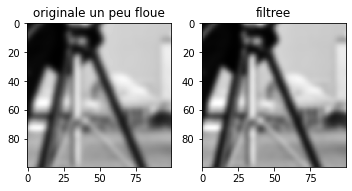

In [231]:
lambda_sharpen = 1
im_sharpened = im_conv10 - lambda_sharpen * (ndimage.gaussian_filter(im_conv10,lambda_sharpen) - im_conv10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
axes[0].imshow(im_conv10[100:200,100:200], cmap='gray')
axes[0].set_title('originale un peu floue')
axes[1].imshow(im_sharpened[100:200,100:200], cmap='gray')
axes[1].set_title('filtree')
fig.tight_layout()

Application du filtre 
$ W=\begin{pmatrix}
   0 & -1 & 0\\
   -1 & 5 & -1\\
   0 & -1 & 0
    \end{pmatrix} $ 
pour ameliorer la netteté aprés filtre Gaussien

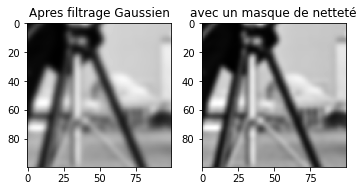

In [232]:
sigma1 = 2
im_conv10 = ndimage.gaussian_filter(Cameraman, sigma1)
W=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
im_W=ndimage.convolve(im_conv10,W,mode='reflect')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
axes[0].imshow(im_conv10[100:200,100:200], cmap='gray')
axes[0].set_title('Apres filtrage Gaussien')
axes[1].imshow(im_W[100:200,100:200], cmap='gray')
axes[1].set_title('avec un masque de netteté')
fig.tight_layout()

## 4) Filtre median

Bien que les filtres linéaires soient faciles à concevoir et à implémenter, notamment avec la propriété de séparabilité, ils ne parviennent pas toujours à éliminer efficacement le bruit. Ces limitations et contraintes ont motivé la création des filtres non-linéaires :
Il s'agit de filtres dont le fonctionnement ne peut être défini comme un produit de convolution. 
Dans le contexte de notre projet, nous traiterons un exemple parmi ces derniers qui est le filtre médian.
Le principe de ce filtre est assez proche du filtre moyenneur sauf que la valeur de chaque pixel en entrée est remplacée par la valeur médiane de ses voisins (et non par la moyenne). Il permet sous certaines conditions de réduire le bruit d'une image tout en conservant ses contours, son contraste  ainsi que sa luminosité.

Afin de pouvoir fixer les idées, nous allons voir comment fonctionne ce mécanisme:


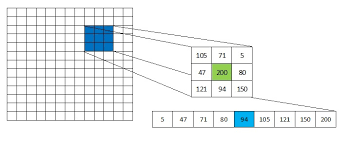

Comme on peut le voir, cela consiste à :
- Choisir le voisinage (dans cet exemple : une matrice 3*3),
- Trier par ordre croissant les valeurs des pixels se trouvant sur le voisinage,
- Et enfin remplacée la valeur du pixel en entrée par la valeur médiane du rangement précédent ; ce qui fera que 200 de l'image initiale seront remplacés par 94 sur l'image de sortie après filtrage.  
Remarque : Pour faciliter ce processus, on a tendance à prendre le cardinal du voisinage impair.

Comparaison entre le filtre moyenneur 5*5

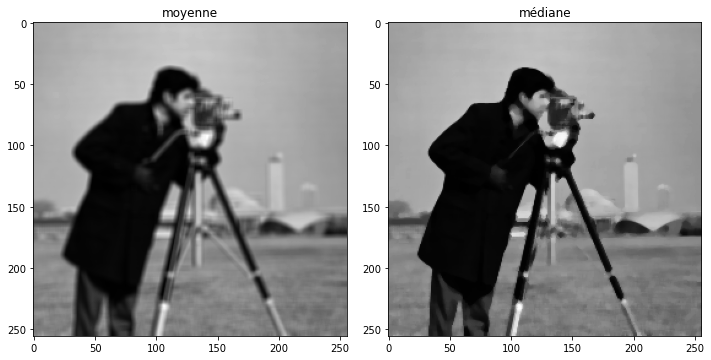

In [233]:
im_med = ndimage.median_filter(Cameraman, size=(5,5), mode='reflect')
# comparaison avec filtre constant
mask = np.ones([5,5])/25
im_conv5x5 = ndimage.convolve(Cameraman, mask, mode='reflect')
# visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(im_conv5x5, cmap='gray')
axes[0].set_title('moyenne')
axes[1].imshow(im_med, cmap='gray')
axes[1].set_title('médiane')
fig.tight_layout()

On constate bien l'amélioration de la netteté dans l'image médiane.
Montrons que le filtre médian peut efficacement enlever du bruit impulsionnel (cf cours1_histogramme, partie 1.4). 

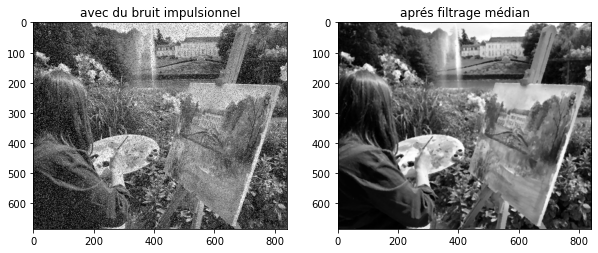

In [235]:
######################################
# Debruitage avec filtrage median ####
######################################

sortie=ndimage.median_filter(imnoise3, size=(5,5), mode='reflect')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].set_title('avec du bruit impulsionnel')
axes[0].imshow(imnoise3,cmap='gray')
axes[1].set_title('aprés filtrage médian')
axes[1].imshow(sortie,cmap='gray')

# 5) Détection de contours, utilité et quelques méthodes :

Le contour est la représentation dans l'image des frontières des objets et des variations dans les propriétés géométriques et physiques de leurs surfaces et englobe souvent les points de discontinuité de la fonction image.
La détection de contours implique la recherche des variations locales et significatives dans la fonction image. Ces variations sont généralement mises en évidence à partir des dérivées de cette fonction dont le type et l'ordre sont déterminés en général par le type du contour et par son utilisation ultérieure. Ils existent plusieurs méthodes de détection de contours, mais diffèrent essentiellement par la connaissance utilisée pour mettre en évidence le contour.
Dans ce projet, nous allons utiliser la différentiation pour mettre en évidence le concept de détection de contours.
Un opérateur de différentiation est caractérisé par son ordre (l'ordre des dérivées partielles), son invariance ou sa variance par rotation, sa direction et par sa linéarité ou non.
On distingue plusieurs méthodes de détection de contours selon ses caractérisations. Mais, nous mettrons en exergue celles qui impliquent l'utilisation des dérivées du premier et du second ordre.

## 5.1 Filtres de dérivation du premier ordre (norme et module du gradient )

Le gradient est défini à partir des dérivées partielles $\frac{\partial}{\partial x} $ et $\frac{\partial}{\partial y} $ et l'opérateur utilisant le gradient le plus utilisé pour détecter les contours est :

La norme du gradient définie par : $ \sqrt{(\frac{\partial}{\partial x})^2 +  (\frac{\partial}{\partial x})^2} $ est non directionnelle et non linéaire, cependant est invariante par rotation. 
Il faut également rappeler que l'orientation du gradient est normale à la direction du gradient et est définie par 
  $\theta$ = arctan($\frac{\partial}{\partial y}$ /$\frac{\partial}{\partial x}$).
  
 **Remarque :**
 
Dans le cas d'une image bruitée, l'utilisation d'un opérateur défini à partir des dérivées calculées dans plusieurs directions permet de fournir des informations contours plus fiables.
Intuitivement, l’œil percevra un contour là où la luminosité de l’image varie brusquement. 
En dimension **1**, on peut considérer qu’un contour correspond à un extremum
local de la dérivée première, ou encore à une annulation de la dérivée seconde (partie qu'on abordera après).

# Visualisation de la norme du gradient de l'image : 

Très utilisés dans la pratique, les filtres de **Sobel et de Prewitt** calculent une dérivée en x ou y de l'image lissée avec un petit filtre de moyenne (quasi gaussien pour Sobel, constant pour Prewitt).

Le filtre de Sobel définit par :
$sobel_x=\begin{pmatrix}
  -1 & -2 & -1\\
   0 & 0 & 0\\
   1 & 2 & 1
    \end{pmatrix}  $.
    
On déduit sobel_y en transposant sobel_x

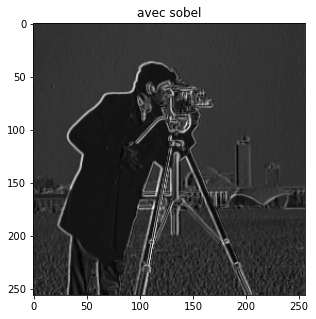

In [236]:
sobel_x = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
im_sobel_x = ndimage.convolve(Cameraman, sobel_x, mode='reflect')
sobel_y = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 2]]
im_sobel_y = ndimage.convolve(Cameraman, sobel_y)
grad_norm1 = np.sqrt(im_sobel_x**2 + im_sobel_y**2)
plt.figure(figsize = (5,5))
plt.imshow(grad_norm1, cmap = 'gray')
plt.title('avec sobel')
plt.show()

Le filtre de Prewitt définit par :
$Prewitt_x=\begin{pmatrix}
  -1 & -1 & -1\\
   0 & 0 & 0\\
   1 & 1 & 1
    \end{pmatrix}  $.
    
On déduit Prewitt_y en transposant Prewitt_x

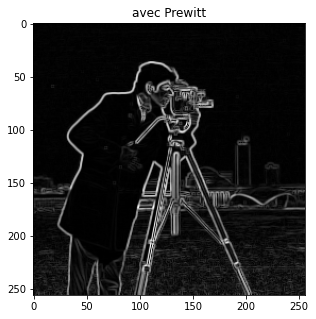

In [237]:
Prewitt_x = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
im_Prewitt_x = ndimage.convolve(Cameraman, Prewitt_x, mode='reflect')
Prewitt_y = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
im_Prewitt_y = ndimage.convolve(Cameraman, Prewitt_y)
grad_norm2 = np.sqrt(im_Prewitt_x**2 + im_Prewitt_y**2)
plt.figure(figsize = (5,5))
plt.imshow(grad_norm2, cmap = 'gray')
plt.title('avec Prewitt')
plt.show()

On peut seuiller la norme du gradient : les pixels dont la norme du gradient dépasse le seuil sont des contours, les autres n'en sont pas. La sortie est donc une image (binaire) de contours.
Cela est visualisé ci-dessous.

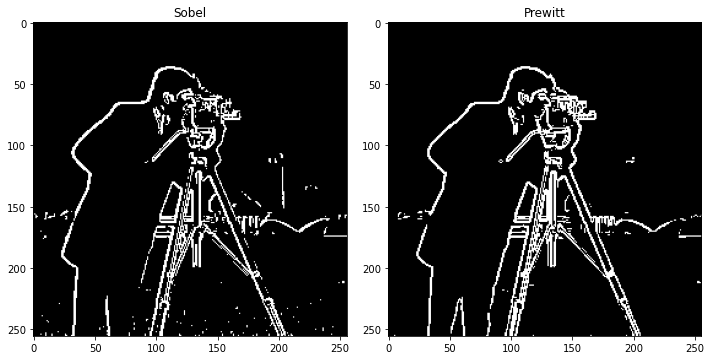

In [238]:
seuil = 0.3
contours1 = (grad_norm1/grad_norm1.max() > seuil)
contours2 = (grad_norm2/grad_norm2.max() > seuil)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(contours1, cmap='gray')
axes[0].set_title('Sobel')
axes[1].imshow(contours2, cmap='gray')
axes[1].set_title('Prewitt')
fig.tight_layout()

On peut aussi s'intéresser à l'orientation du gradient. Comme il s'agit d'un angle, il est agréable de le représenter comme teinte dans une représentation couleur du type HSV.

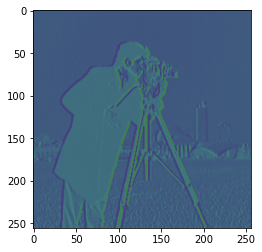

In [239]:
import math
# angle entre -pi et pi
orient = np.arctan(im_sobel_y,im_sobel_x)
# normalisation entre 0 et 1
orient = (orient + math.pi)/(2*math.pi)
#création d'une image couleur en HSV
[nrow,ncol]=Cameraman.shape
orient_color = np.ones((nrow,ncol,3))/2 # à régler plus finement
orient_color[:,:,0] = orient
orient_color = matplotlib.colors.hsv_to_rgb(orient_color) # La fonction matplotlib.colors.hsv_to_rgb() est utilisée pour convertir les valeurs hsv en rgb.
plt.imshow(orient_color)

# 5.2 Filtres de dérivation du second ordre (laplacien)

Il est défini à partir des dérivées partielles secondes $ \frac{\partial^2}{\partial x^2}  $, $ \frac{\partial^2}{\partial y ^2} $ et $ \frac{\partial^2}{\partial x \partial y}$. Les opérateurs du second ordre les plus utilisés en détection de contours sont le laplacien et la seconde dérivée directionnelle prise dans la direction du gradient $\theta$. 
Ces derniers sont respectivement définis par : 

$\nabla = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} $ et 

$ \frac{\partial^2}{\partial \theta^2} = \frac{\partial^2}{\partial x^2} \cos^2({\theta}) +  \frac{\partial^2}{\partial x \partial y} \cos({\theta}) \sin({\theta}) + \frac{\partial^2}{\partial y^2} \sin^2({\theta}) $. 

Ils sont tous invariants par rotation, mais seul le laplacien est linéaire.
On développera seulement la méthode utilisant le laplacien.
L'utilisation du laplacien assure l'obtention de contours fermés. Cependant, les contours résultats de l'utilisation de la seconde dérivée prise dans la direction du gradient ne possèdent pas des propriétés géométriques spécifiques ; par exemple, ils ne sont pas fermés. En général, ce type d'opérateur permet une bonne précision dans la localisation des contours détectés.

La dérivée seconde centrée en x d'une image peut être approchée par la convolution avec le masque 

$K0 =\begin{pmatrix}
  0 & 0 & 0\\
   1/4 & -1/2 & 1/4\\
    0 & 0 & 0
    \end{pmatrix}  $.
    
La dérivée seconde centrée en y par la convolution avec le masque
 $K1=\begin{pmatrix}
  0 & 1/4  & 0\\
   0 & -1/2 & 0\\
    0 & 1/4  & 0
    \end{pmatrix}  $
    
 Le laplacien, qui est la somme des dérivées secondes en x et en y (formellement la trace de l'hessienne), de même, peut être approché par la convolution avec le masque
 
  $K2=\begin{pmatrix}
   0 & 1/4  & 0\\
   1/4  & -1 & 1/4 \\
    0 & 1/4  & 0
    \end{pmatrix}  $

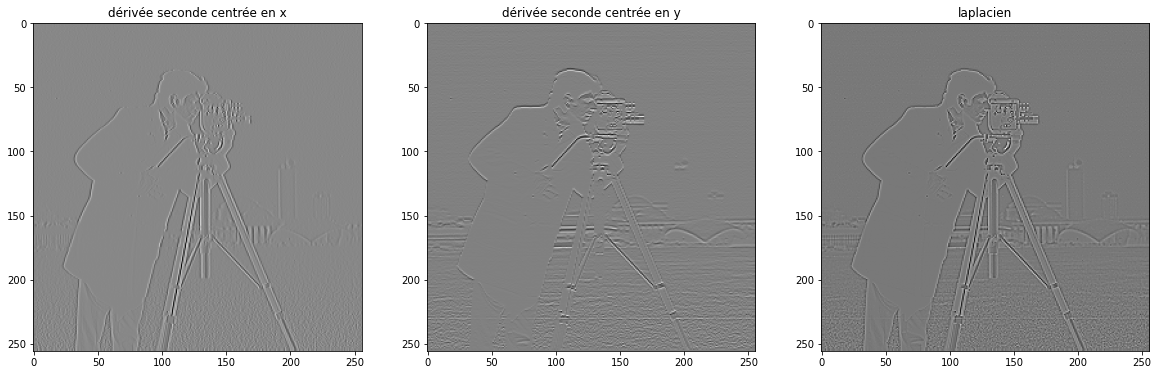

In [240]:
k0=np.array([[0 , 0 , 0],[ 1/4 , -1/2 , 1/4 ], [ 0 , 0 , 0 ]])
k1=np.array([[0 , 1/4 , 0],[ 0 , -1/2 , 0 ], [ 0 , 1/4 , 0 ]])
k2= np.array([[0 , 1/4 , 0],[1/4 , -1 , 1/4 ], [ 0 , 1/4 , 0 ]])            
im_k0 = ndimage.convolve(Cameraman, k0)
im_k1 = ndimage.convolve(Cameraman, k1)
im_k2 = ndimage.convolve(Cameraman, k2)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))

axes[0].set_title('dérivée seconde centrée en x')
axes[0].imshow(im_k0,cmap='gray')

axes[1].set_title('dérivée seconde centrée en y')
axes[1].imshow(im_k1,cmap='gray')

axes[2].set_title('laplacien')
axes[2].imshow(im_k2,cmap='gray')



L'utilisation du laplacien assure l'obtention de contours fermés. Si on regarde le résultat obtenu avec le laplacien, les contours sont plus visibles comparer aux autres.

On voit dans la formule du laplacien ci-dessus qu'il s'agit de la moyenne des 4 voisins à laquelle on retranche la valeur centrale. Le laplacien mesure la cohérence du pixel courant par rapport à ses voisins.
On peut démontrer que le laplacien peut être approché par la convolution avec n'importe quel filtre de somme nulle, où tous les coefficients non-centraux sont supérieurs ou égaux à 0 (donc le coefficient central négatif), vérifiant quelques propriétés de moments et d'isotropie... En particulier, les masques suivants permettent d'approcher le laplacien d'une image :

$mask =\begin{pmatrix}
  1/8  & 1/8  & 1/8 \\
  1/8  & -1 & 1/8 \\
    1/8  & 1/8  & 1/8
    \end{pmatrix}  $.


masque constant carré de taille quelconque avec coefficient central égal à la somme de tous les autres (renormalisé)

masque gaussien avec coefficient central égal à la somme de tous les autres

différence entre 2 masques gaussiens, le premier de grande variance, le deuxième de faible variance...
Programmer le laplacien en utilisant ndimage.gaussian_laplace. De quel schéma s'agit-il ? Que fait le coefficient sigma ?

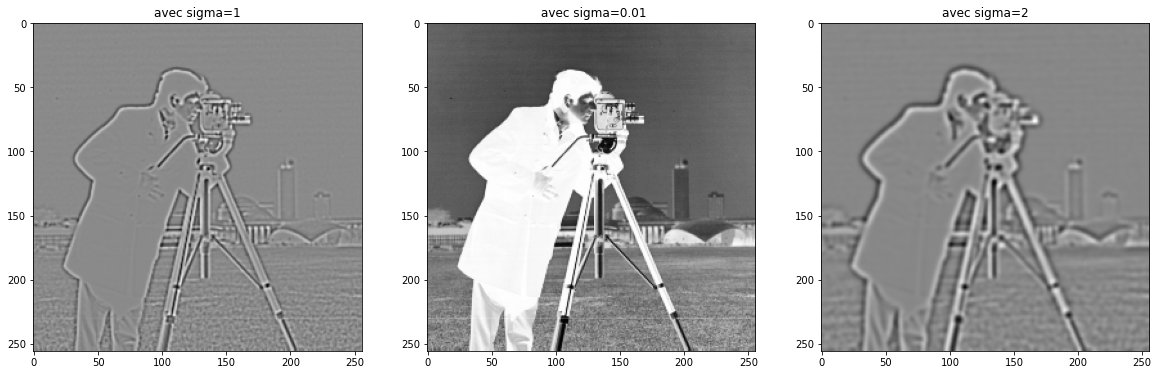

In [241]:
new_im=ndimage.gaussian_laplace(Cameraman,sigma=1)
new_im2=ndimage.gaussian_laplace(Cameraman,sigma=0.01)
new_im3=ndimage.gaussian_laplace(Cameraman,sigma=2)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))

axes[0].set_title('avec sigma=1')
axes[0].imshow(new_im,cmap='gray')

axes[1].set_title(' avec sigma=0.01')
axes[1].imshow(new_im2,cmap='gray')

axes[2].set_title('avec sigma=2')
axes[2].imshow(new_im3,cmap='gray')

Il s'agit du filtre Laplace multidimensionnel utilisant un second dérivé gaussien.
Le paramètre sigma s'agit d'un scalaire ou une séquence de scalaires.
Les écarts-types du filtre gaussien sont donnés pour chaque axe comme une séquence, ou comme un seul nombre, auquel cas, il est égal pour tous les axes.

# Remarque
Parfois, pour améliorer les résultats de détection de contours,  on cherche les annulations du laplacien de l’image.
Pour simplifier, on considère que le laplacien s’annule entre deux pixels voisins si les valeurs
qu’il prenne sur chaque pixel sont de signes opposés. Toutefois, cette méthode risque de détecter les petites oscillations locales dues au bruit, même après débruitage (qui atténue le bruit sans le faire disparaître totalement). Pour éviter cela, il faut appliquer un double seuillage du laplacien.

# Conclusion :

Dans le contexte de vouloir obtenir une meilleure image, on a vu différentes méthodes qui consistent à appliquer du filtre (filtres linéaires et le filtre médian) à l'image en question, mais également à faire des analyses avec la détection de contours.
Au vu des traitements faits dans ce projet, on voit bien que les filtres linéaires (étudiés ici qui sont le filtre moyenneur et le filtre Gaussien) permettent la réduction de bruit.
Par contre, ces méthodes présentent des inconvénients. 
En effet, si on prend le filtre moyenneur,   l'opération ne peut être appliquée aux pixels situés aux bords de l'image. En conséquence, dégrade l'information pertinente dans le cas d'une détection de contours. Mais aussi avec le principe selon lequel se base le filtre moyenneur, des incohérences peuvent s'avérer, surtout si le nombre de voisins considéré est grand : il y a de plus grandes chances qu'un pixel soit corrigé en fonction de pixels qui décrivent différents objets dans l'image, et qui ont ainsi peu de points communs avec lui. Un des impacts de cette méthode est que l'image obtenue est floue. Même si le filtre Gaussien ne cause pas de recouvrement spectral, il atténue le bruit et quand le nombre de  gaussiennes est suffisamment grand, il tend vers 0. Malheureusement, on n'obtient pas l'image parfaite, mais l'image lissée, d'où le résultat flou. Donc Ce problème de flou est intrinsèque aux filtres linéaires. Face à ce problème de flou, on a vu que le shaperning contribue très bien à la réduction du bruit, mais n'est pas assez efficace pour pouvoir se débarrasser carrément du bruit.
Cependant, le filtre médian résout le problème que rencontre les filtres linéaires en éliminant le bruit sans mettre du flou. Il est notamment très efficace pour éliminer le bruit impulsionnel. Contrairement au filtrage linéaire, il produit un épaississement des contours et accentue l'effet de binarisation de plus peut s'appliquer aux images binaires (à deux valeurs), et le résultat restera une image binaire. Mais il faut noter que le filtrage médian arrondi tout de même les angles et est coûteux, car il faut mettre en place un tri.
Ainsi, il est plus commode de faire appel à un filtre médian lorsque le bruit à éliminer est de nature impulsionnel, mais en théorie, le lissage linéaire élimine mieux le bruit Gaussien.
Hormis ces deux cas évoqués, le choix entre le lissage linéaire et le filtre médian est ouvert. En somme, nous pouvons dire que le choix du type de filtrage dépend du cas à traiter.
Les contours constituent des indices riches pour toute interprétation ultérieure de l'image.  Dans une image, ils proviennent des : discontinuités de la fonction de réflectance (texture, ombre), discontinuités de profondeur (bords de l'objet), et sont caractérisés par des discontinuités de la fonction d'intensité dans les images. Donc, il est naturel d'étudier ces derniers, d'où la nécessité du mécanisme de détection de contours. Elle doit être efficace et fiable, car la validité et les possibilités de réalisation des traitements ultérieurs y sont directement liées.  Cependant, la présence du bruit dans l'image rend difficile la conception d'un algorithme général de détection de contours satisfaisant d'une manière optimale ces exigences. Elle doit être efficace et fiable, parce que la validité et les possibilités de réalisation des traitements ultérieurs y sont directement liés.  Toutefois, la présence du bruit dans l'image rend difficile la conception d'un algorithme général de détection de contours satisfaisant d'une manière optimale ces exigences. Raison pour laquelle on distingue plusieurs méthodes de ce processus dont chacun efficace en fonction du problème en question.

# Références :

http://www.setit.rnu.tn/last_edition/setit2009/Image%20and%20Video/65.pdf
https://www.photohc.com/blog/2019/12/23/les-types-de-bruit
https://www.cambridgeincolour.com/tutorials/image-sharpening.htm
https://www.analyticsvidhya.com/blog/2021/08/sharpening-an-image-using-opencv-library-in-python/
http://thesis.univ-biskra.dz/2271/6/Chapitre%2003.pdf
https://www6.inrae.fr/pfl-cepia/Axe-images/Tutoriel/Filtrage-lineaire
https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5026661-filtrez-une-image
https://www.kevinpolisano.com/Formation/Ensimag2A/TP/ti_sujet_tp2.pdf
http://wcours.gel.ulaval.ca/2017/a/GIF4100/default/5notes/A2017TraitementImagesPartie1PageWeb.pdf
https://www.cambridgeincolour.com/tutorials/image-sharpening.htm
https://fiveko.com/assets/pics/math/median.jpg
https://perso.math.univ-toulouse.fr/fdelebec/files/2019/02/image.pdf
https://hal.univ-lorraine.fr/tel-01751008/document

wikipedi